<a href="https://colab.research.google.com/github/Stark-developer01/Text-Detection-using-OCR-from-Images/blob/main/OCR_TextDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing Essential Python Libraries for the Project 

Tesseract Library & Documentation - https://pypi.org/project/pytesseract/

In [ ]:
pip install opencv-python

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
!pip install pytesseract

In [ ]:
#pip install pytesseract

### **TEXT EXTRACTION FROM IMAGES BASED ON OCR USING TESSERACT-OCR LIBRARY**

In [ ]:
#@title Importing essential libraries
#Importing the libraries
import cv2
import pytesseract
import shutil
import os
import random
try:
  from PIL import Image
except ImportError:
  import Image

In [ ]:
from google.colab.patches import cv2_imshow

**Here we read the image from the folder and since we don't have a tesseract executable in our path we add it to our path using the method tesseract_cmd method**

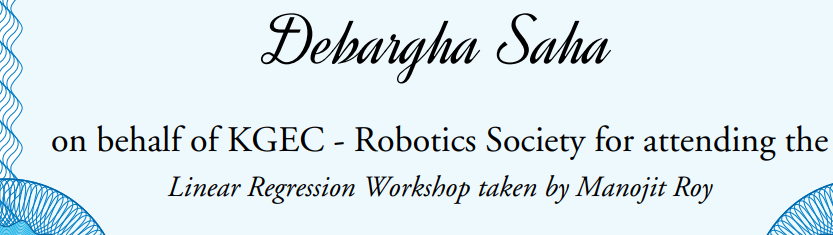

In [ ]:
pytesseract.pytesseract.tesseract_cmd = ( r'/usr/bin/tesseract' )
img = cv2.imread('/content/drive/MyDrive/Screenshots/Screenshot (5).png')
cv2_imshow(img)

In [ ]:
#Converting our Image to Text/String
result = pytesseract.image_to_string(img)
print(result)

**Converting our Image to boxes for each of the individual character**

In [ ]:
print(pytesseract.image_to_boxes(img))

In [ ]:
#@title Detecting each of the individual characters from the image processed
#Detecting Characters
hImg,wImg,_ = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
  print(b)
  b = b.split(' ') #Putting into a list to print each of the attribute for the individual character
  print(b)
  x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
  cv2.rectangle(img,(x,hImg-y),(w,hImg-h),(0,0,255),1)
  cv2.putText(img,b[0],(x+10,hImg-y+15),cv2.FONT_HERSHEY_PLAIN,1,(50,50,255),1)


cv2_imshow(img)

**Converting our Image to Data for each of the string and numerical characters extracted from the Image and printing it on the image itself**

In [ ]:
hImg,wImg,_ = img.shape
data = pytesseract.image_to_data(img)
print(data)
for x,b in enumerate(data.splitlines()):
  if(x!=0):
    b = b.split()
    print(b)
    if len(b)==12:
      x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
      cv2.rectangle(img,(x,y),(w+x,h+y),(0,0,255),2)
      cv2.putText(img,b[11],(x,y-5),cv2.FONT_HERSHEY_PLAIN,1,(50,50,255),1)

cv2_imshow(img)